    DataFrame은 2차원 배열형식, 표같은 스프레드 시트 자료구조
    여러개의 컬럼을 가지며 서로다른 종류의 값이 담긴다.
    
    DataFrame은 다양한 방법으로 생성할 수 있다.
    가장 흔하게 사용할 수 있는 방법은 3가지가 있다.
    1. 리스트 값을 딕셔너리로 만들수 있다.
    2. Numpy배열을 이용해서 만들수 있다.
    3. read_csv(), read_excel(), read_html() 옆의 세가지 함수들을 사용해서 만들수 있다. 
    3번째 방법을 가장 많이 사용한다 
    
    csv = comma, seperated, values 

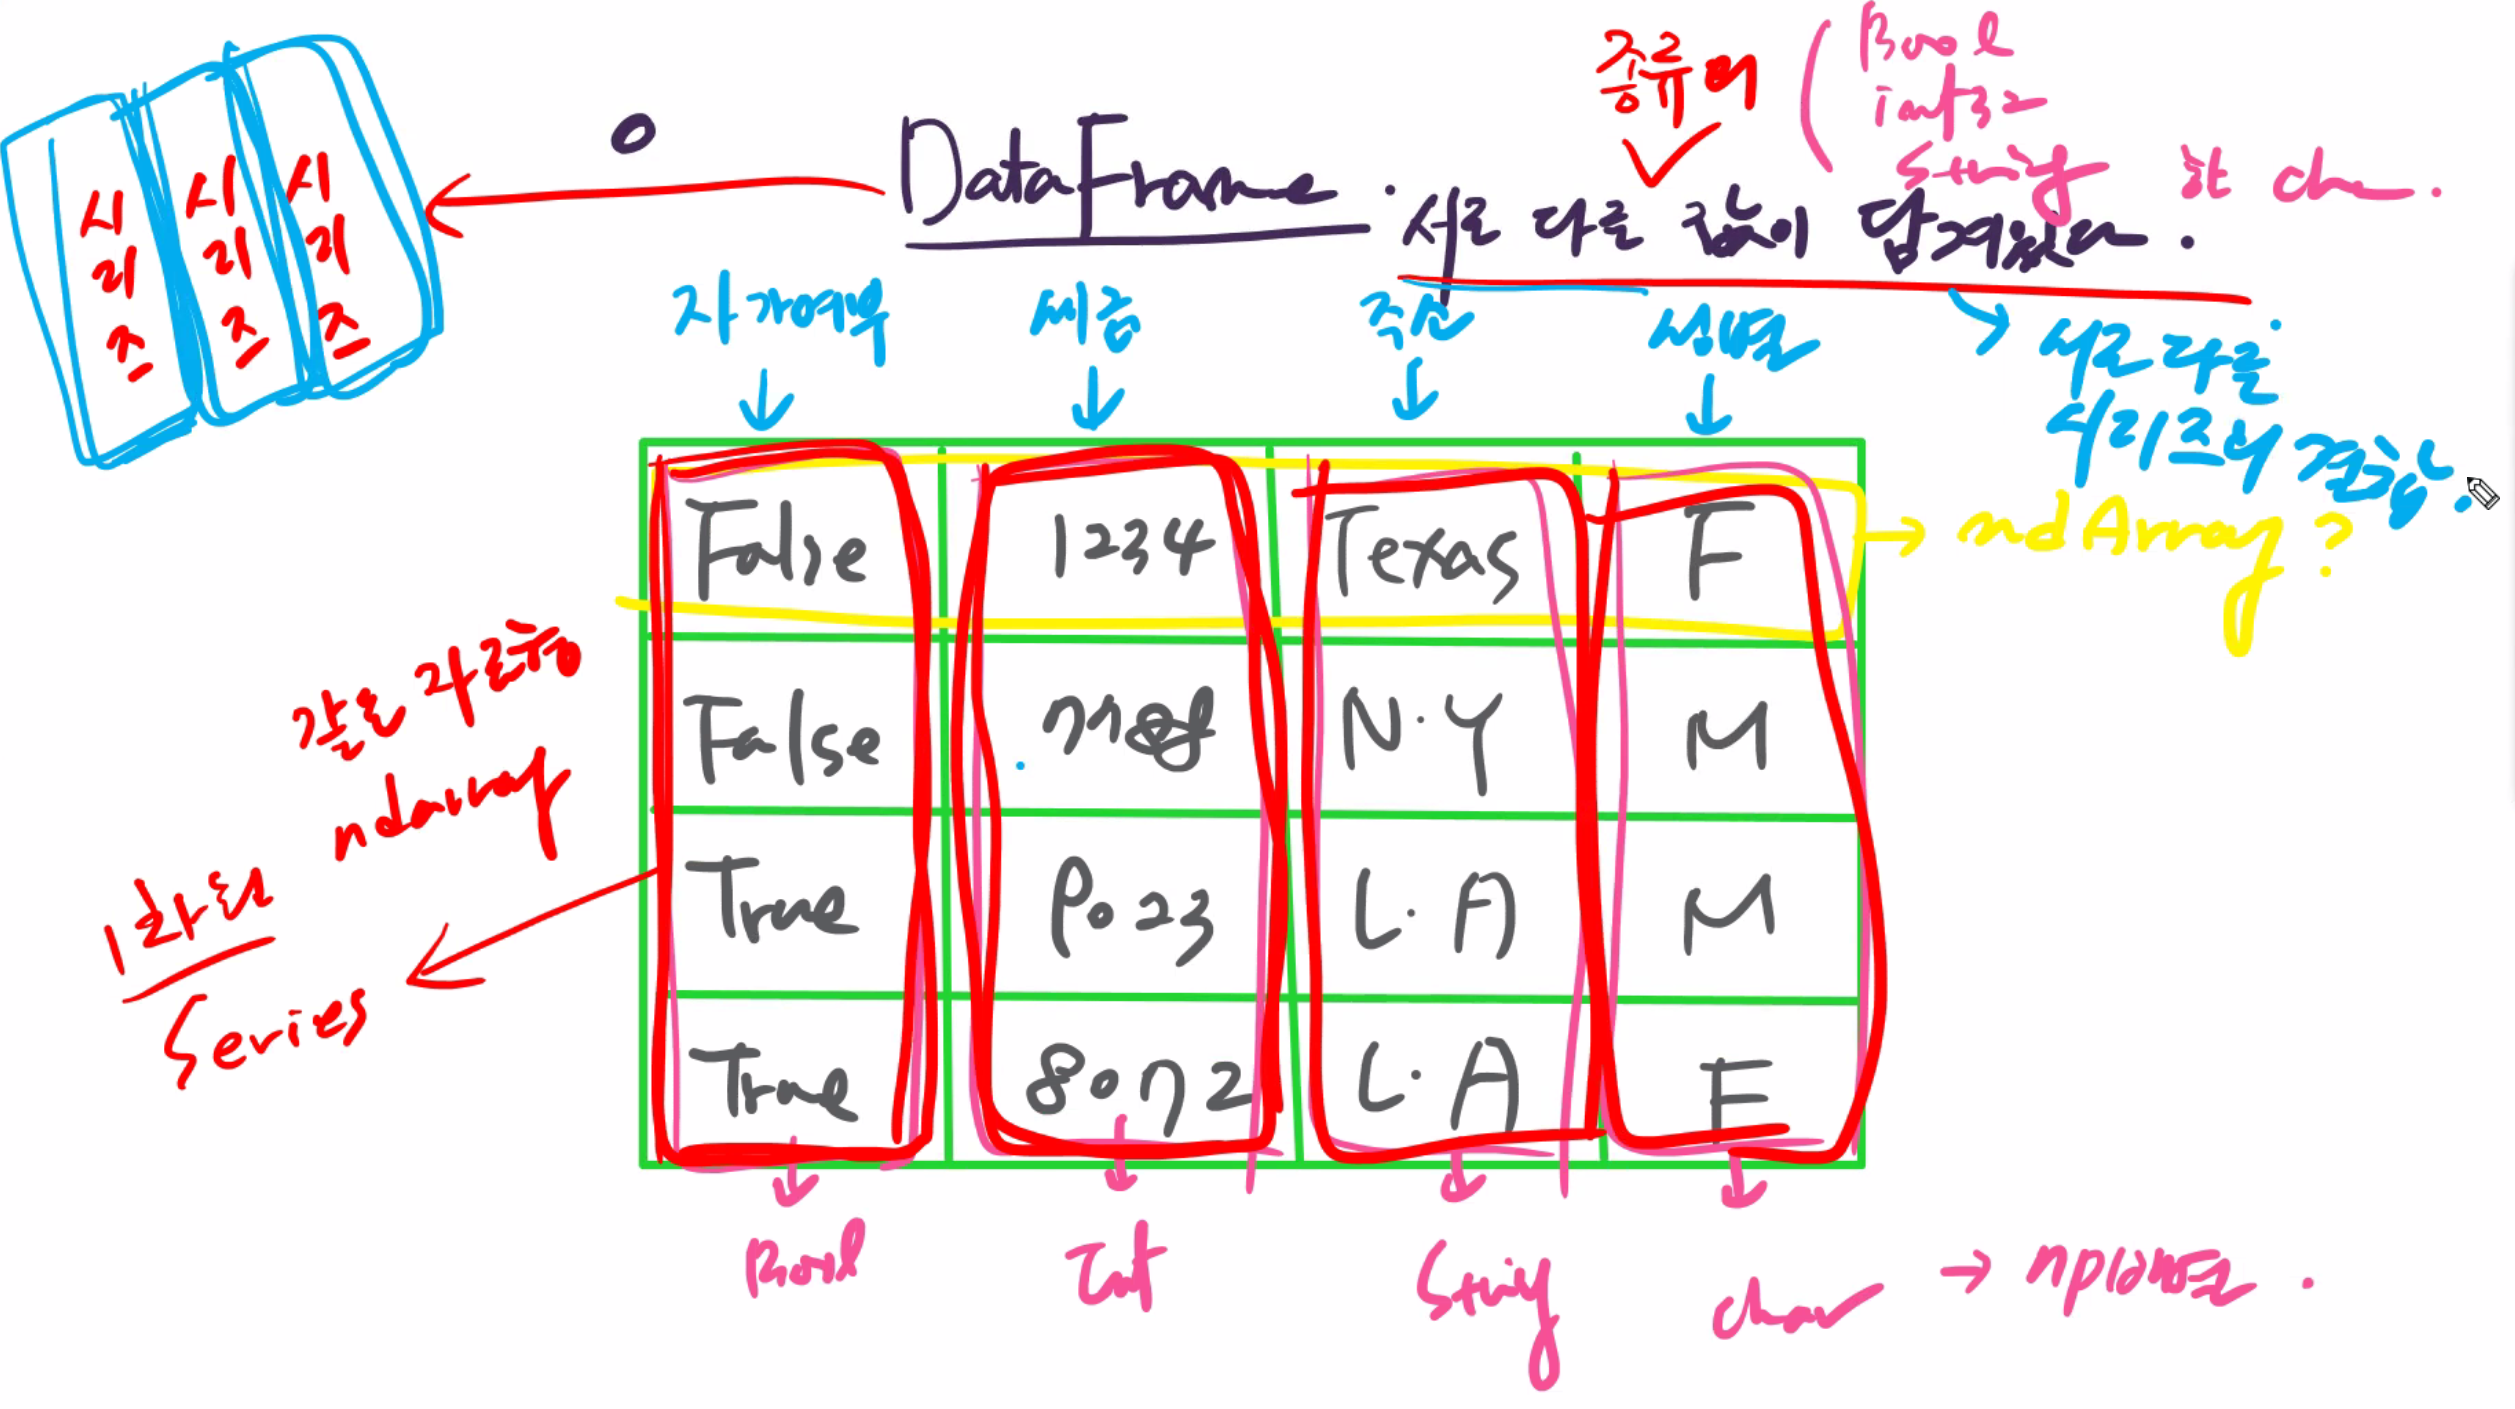

### DataFrame
#### 1. DataFrame 생성 (mat 사용)

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [2]:
list_dic={'state' : ['Ohio','Ohio','Ohio','Nevada','Nevada','Nevada'], 
         'year' : [2000, 2001, 2002, 2001, 2002, 2003],
         'pop' : [1.5, 1.7, 3.6, 2.4, 2.9, 3.2]}
# DataFrame? potentially heterogeneous tabular data.로 인해 각각다른 dtype을 갖고 있다.
# 각각의 컬럼에 해당하는 상>하 방향의 한줄이 시리즈라고 보면된다.
# DataFrame은 시리즈들의 결합체,
# 시리즈는 ndarray타입으로 만들어져 있다.
dicDf = DataFrame(list_dic)

# 2가지 방법으로 컬럼명을 표현할 수 있다.
#print(type(dicDf.state))
#print(type(dicDf.year))
#print(type(dicDf.pop))
print(type(dicDf['state']))
print(type(dicDf['year']))
print(type(dicDf['pop']))

<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>
<class 'pandas.core.series.Series'>


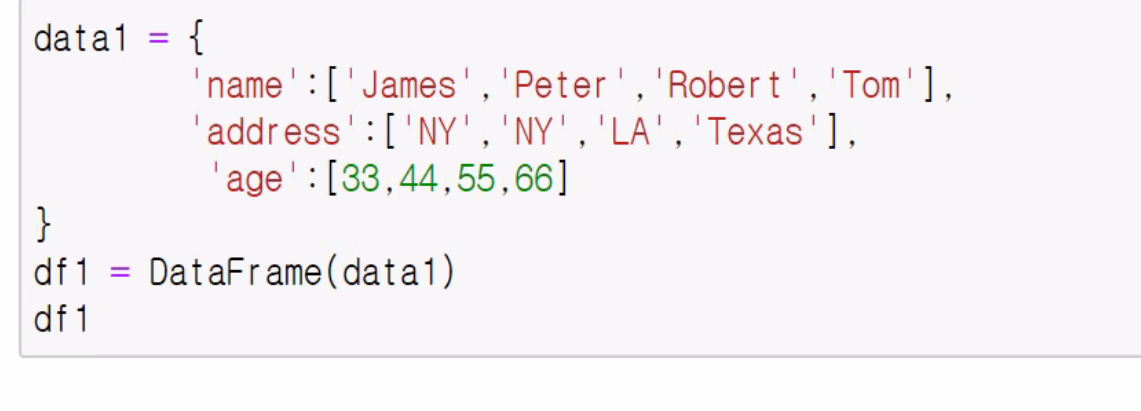

In [3]:
# 데이터 프레임을 만들때 키값은 컬럼명이 된다.
data1 = {'name' : ['James', 'Peter','Robert','Tom'],
        'address' : ['NY', 'NY', 'LA','Texas'],
        'age' : [33,44,55,66]}

df1 = DataFrame(data1)
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


#### 2. DataFrame생성 - Numpy 배열 사용

In [4]:
# 1. df2 = DataFrame(np.random.randint(10,100,16))
# reshape를 사용해서 차원을 변형해준다. .reshape(4,4) 갯수 맞춰 줘야한다.
df2 = DataFrame(np.random.randint(10,100,16).reshape(4,4))
df2



,0,1,2,3
0,19,60,40,13
1,15,94,92,31
2,48,28,17,67
3,94,54,14,84


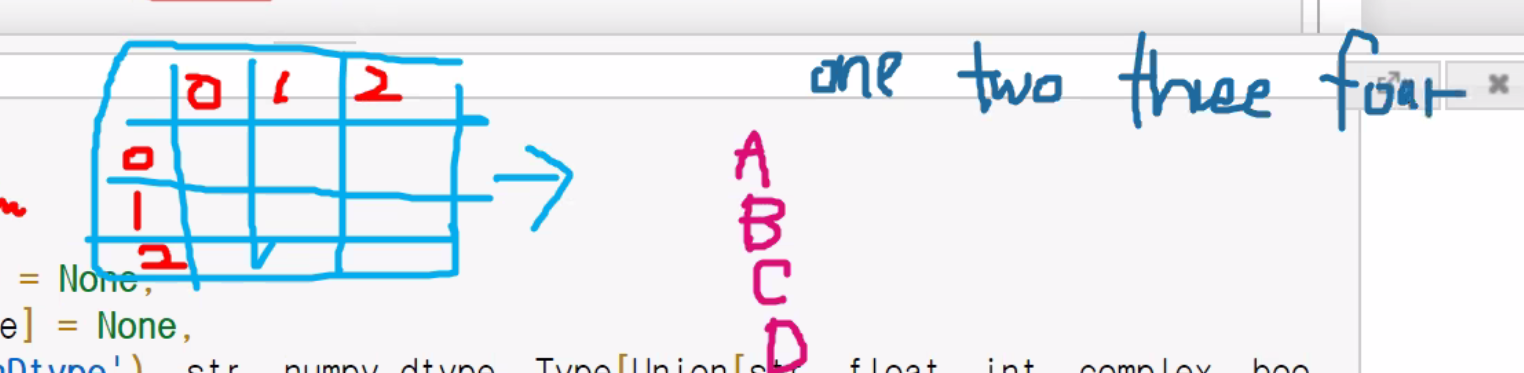

In [5]:
# 인덱스와 컬럼을 직접 지정해주자
# 컬럼명을 지정해줄때 문자열이면 배열을 따로 만들어서 넣어줘야 한다.
df2 = DataFrame(np.random.randint(10,100,16).reshape(4,4),index=list('ABCD'), columns=['ONE','TWO','THREE','FOUR'])
df2

,ONE,TWO,THREE,FOUR
A,69,20,52,27
B,51,36,22,54
C,28,54,37,93
D,88,50,84,22


#### 3. DataFrame 생성 - read_csv() 함수 사용

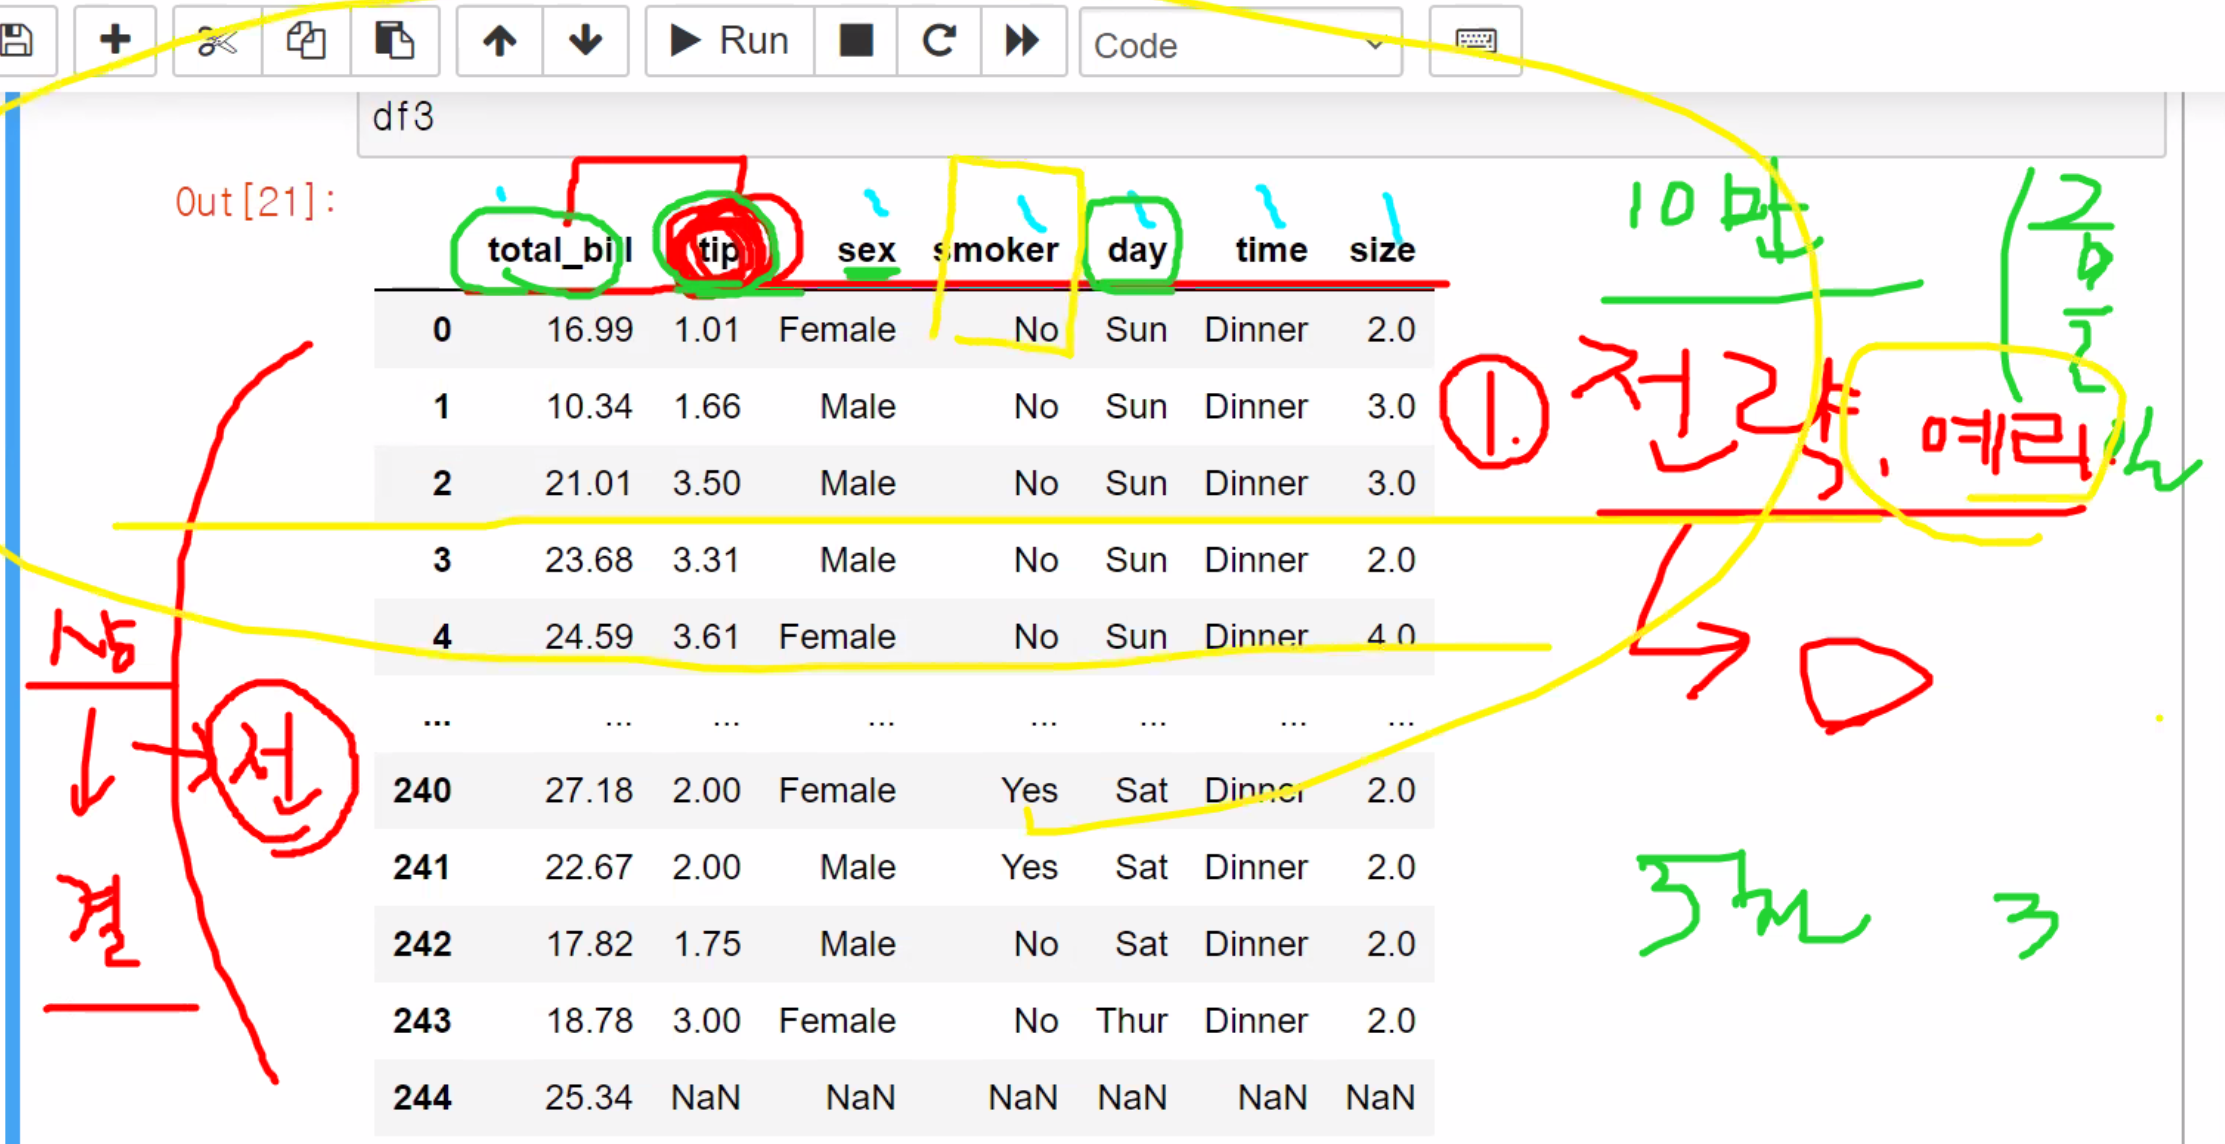

In [6]:
'''
csv 는 콤마를 기준으로 분류 되어있다.
데이터를 뽑아낼때는 인덱스나 컬럼으로 뽑아낼수 있다.

데이터 전략 > 데이터에 대한 예리한 분석, 전략을 세워야한다.

누락데이터가 어디에 들어있는지 정도는 확인해두고 간다. 마지막행에는 무조건 NaN이 들어간다.
'''
df3 = pd.read_csv('../data/tips.csv') # 레스토랑 정보.
df3

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2.0
1,10.34,1.66,Male,No,Sun,Dinner,3.0
2,21.01,3.50,Male,No,Sun,Dinner,3.0
3,23.68,3.31,Male,No,Sun,Dinner,2.0
4,24.59,3.61,Female,No,Sun,Dinner,4.0
...,...,...,...,...,...,...,...
240,27.18,2.00,Female,Yes,Sat,Dinner,2.0
241,22.67,2.00,Male,Yes,Sat,Dinner,2.0
242,17.82,1.75,Male,No,Sat,Dinner,2.0
243,18.78,3.00,Female,No,Thur,Dinner,2.0


#### 4. DataFrame - 구조

In [7]:
df1

,name,address,age
0,James,NY,33
1,Peter,NY,44
2,Robert,LA,55
3,Tom,Texas,66


In [8]:
print('df1.index : ',df1.index)
print('*'*30)
print('df1.columns : ', df1.columns) #리스트형
print('*'*30)
print('df1.values : ' ,df1.values) # 2차원
print('*'*30)
print('df1.dtypes : ' ,df1.dtypes) # 컬럼에 대한 타입명이 나온다.
print('*'*30)
print('df1.T : ', df1.T) #T는 (Transpose = 행과 열을 뒤바꾼다.)
print('*'*30)
df1.info()

df1.index :  RangeIndex(start=0, stop=4, step=1)
******************************
df1.columns :  Index(['name', 'address', 'age'], dtype='object')
******************************
df1.values :  [['James' 'NY' 33]
 ['Peter' 'NY' 44]
 ['Robert' 'LA' 55]
 ['Tom' 'Texas' 66]]
******************************
df1.dtypes :  name       object
address    object
age         int64
dtype: object
******************************
df1.T :               0      1       2      3
name     James  Peter  Robert    Tom
address     NY     NY      LA  Texas
age         33     44      55     66
******************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   name     4 non-null      object
 1   address  4 non-null      object
 2   age      4 non-null      int64 
dtypes: int64(1), object(2)
memory usage: 224.0+ bytes


In [9]:
print(df3)
print('*'*30)
print(df3.head()) #head()의 기본 값은 5개 이다. 
print('*'*30)
print(df3.head(12)) #상단에서 부터 시작해서 12개만 보여줌
print('*'*30)
print(df3.tail()) # 디폴트값 = 끝에서 부터 5번째줄 부터 보여줌
print('*'*30)
print(df3.tail(2)) # 끝에서 부터 앞으로 2칸 (n-2칸부터 자료를 출력한다.)
print('*'*30) 
print(df3.shape) # 이 함수는 배열의 형태를 튜플로 반환합니다. (245, 7)> 245행 7열 즉, 7개의 시리즈값을 갖는다.
print('*'*30)
print(df3.T)

     total_bill   tip     sex smoker   day    time  size
0         16.99  1.01  Female     No   Sun  Dinner   2.0
1         10.34  1.66    Male     No   Sun  Dinner   3.0
2         21.01  3.50    Male     No   Sun  Dinner   3.0
3         23.68  3.31    Male     No   Sun  Dinner   2.0
4         24.59  3.61  Female     No   Sun  Dinner   4.0
..          ...   ...     ...    ...   ...     ...   ...
240       27.18  2.00  Female    Yes   Sat  Dinner   2.0
241       22.67  2.00    Male    Yes   Sat  Dinner   2.0
242       17.82  1.75    Male     No   Sat  Dinner   2.0
243       18.78  3.00  Female     No  Thur  Dinner   2.0
244       25.34   NaN     NaN    NaN   NaN     NaN   NaN

[245 rows x 7 columns]
******************************
   total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner   2.0
1       10.34  1.66    Male     No  Sun  Dinner   3.0
2       21.01  3.50    Male     No  Sun  Dinner   3.0
3       23.68  3.31    Male     No  Sun  Dinn